Author: Aleksejs Anufrijevs
Group: 4502BD

# Lab 4 - Linear Regression

## Libraries

In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.random import normal
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Linear regression class

In [2]:
class linear_regression:
    def __init__(self):
        self.__params = None
        self.coef_ = None

    def fit(self,X,y):
        n,_= X.shape
        X = np.append(np.ones((n,1)),X,axis=1)
        X_T = X.T
        A = np.dot(X_T,X)
        b = np.dot(X_T,y)
        self.__params = np.dot(inv(A),b)
        #self.__params = np.linalg.solve(A,b)
        self.coef_ = self.__params[1:,:].copy()
        return self

    def predict(self,X):
        n,_= X.shape
        X = np.append(np.ones((n,1)),X,axis=1)
        return X.dot(self.__params)

    def score(self,X, y):
        y_predict = self.predict(X)
        u = ((y - y_predict)**2).sum()
        v = ((y - y_predict.mean())**2).sum()
        return (1-u/v)

## Init linear regressions algorithms

### My version

In [3]:
my_linreg = linear_regression()

### Sklearn version

In [4]:
sk_linreg = LinearRegression()

## Restore line using points

In [5]:
n_points = 10

### Init x values

In [6]:
X_points = np.arange(n_points).reshape((n_points,1))
print('x =\n',X_points)

x =
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


### Init y values

In [7]:
y_points = (np.arange(n_points) + normal(loc=0,scale=2,size=n_points)).reshape((n_points,1))
print('y =\n',y_points)

y =
 [[-2.60076422]
 [ 1.65006226]
 [ 1.83183029]
 [ 0.98601376]
 [ 3.16094593]
 [ 7.1821403 ]
 [ 5.97531683]
 [ 8.57486719]
 [ 6.3273144 ]
 [ 7.40873515]]


### Train algorithms

In [8]:
my_linreg.fit(X_points,y_points);
sk_linreg.fit(X_points,y_points);

In [9]:
sk_linreg.coef_

array([[1.0638215]])

In [10]:
my_linreg.coef_

array([[1.0638215]])

### Show train results

#### Plot

In [11]:
line_x = np.array([X_points[0],X_points[n_points-1]])

##### My line

In [12]:
my_line_y = my_linreg.predict(line_x)

##### Sk line

In [13]:
sk_line_y = sk_linreg.predict(line_x)

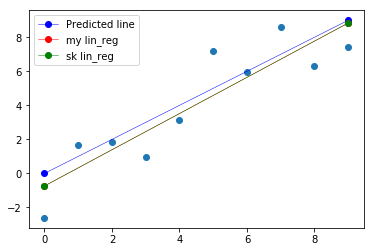

In [14]:
plt.scatter(X_points,y_points)
plt.plot(line_x,line_x,'bo-',label = 'Predicted line',linewidth=0.5)
plt.plot(line_x,my_line_y,'ro-',label = 'my lin_reg',linewidth=0.5)
plt.plot(line_x,sk_line_y,'go-',label = 'sk lin_reg',linewidth=0.5)
plt.legend()
plt.show()

### Metrics

#### Prediction

In [15]:
my_y_pred = my_linreg.predict(X_points)
sk_y_pred = sk_linreg.predict(X_points)

#### R^2 

{-1;1}, 0 is bad, 1 or -1 is good

In [16]:
print('my = ',my_linreg.score(X_points,y_points))
print('sk = ',sk_linreg.score(X_points,y_points))

my =  0.8080195827753817
sk =  0.8080195827753817


#### Mean absolute error

0 is good

In [17]:
print('my = ',mean_absolute_error(my_y_pred,y_points))
print('sk = ',mean_absolute_error(sk_y_pred,y_points))

my =  1.312343633561793
sk =  1.312343633561793


#### Mean squared error

0 is good

In [18]:
print('my = ',mean_squared_error(my_y_pred,y_points))
print('sk = ',mean_squared_error(sk_y_pred,y_points))

my =  2.2183318746744707
sk =  2.2183318746744702


## Computer relative performance

### Read data

In [19]:
headers = ['vendor','myct','mmin','mmax','cach','chmin','chmax','prp','erp']
df = pd.read_csv('machine.data',index_col=1,sep=',',header=None,names=headers)

### Preprocess data

In [20]:
n = len(df)

In [21]:
y = df['prp'].values # value for prediction
df.drop(columns=['prp','erp'],inplace=True)
df_dummies = pd.get_dummies(df,drop_first =True)# for future use
df.drop(columns=['vendor'],inplace=True)

In [22]:
print('Has \'None\' = ',df.isin(['None']).any(axis=None))

Has 'None' =  False


### Prediction without non-digit values

In [23]:
df.head()

,myct,mmin,mmax,cach,chmin,chmax
32/60,125,256,6000,256,16,128
470v/7,29,8000,32000,32,8,32
470v/7a,29,8000,32000,32,8,32
470v/7b,29,8000,32000,32,8,32
470v/7c,29,8000,16000,32,8,16


#### Data

In [24]:
(n,m) = df.shape
y = y.reshape((n,1))
X = df.values

#### Train

In [25]:
my_linreg.fit(X,y);
sk_linreg.fit(X,y);

#### Params

In [26]:
df_params = pd.DataFrame({'My':my_linreg.coef_.flatten(),'Sk':sk_linreg.coef_.flatten()})
df_params

,My,Sk
0,0.048855,0.048855
1,0.015293,0.015293
2,0.005571,0.005571
3,0.641401,0.641401
4,-0.270358,-0.270358
5,1.482472,1.482472


#### prediction metrics

In [27]:
my_y_pred = my_linreg.predict(X)
sk_y_pred = sk_linreg.predict(X)

In [28]:
print('R^2:\n\tmy:',my_linreg.score(X,y))
print('\tsk = ',sk_linreg.score(X,y))
print('MAE:\n\tmy:',mean_absolute_error(y,my_y_pred))
print('\tsk = ',mean_absolute_error(y,sk_y_pred))
print('MSE:\n\tmy:',mean_squared_error(y,my_y_pred))
print('\tsk = ',mean_squared_error(y,sk_y_pred))

R^2:
	my: 0.8648906922768672
	sk =  0.8648906922768671
MAE:
	my: 37.945441714607234
	sk =  37.94544171460721
MSE:
	my: 3478.0866756153555
	sk =  3478.0866756153564


### Prediction with dummies

####  dummies

In [29]:
df_dummies.head()

,myct,mmin,mmax,cach,chmin,chmax,vendor_amdahl,vendor_apollo,vendor_basf,vendor_bti,...,vendor_microdata,vendor_nas,vendor_ncr,vendor_nixdorf,vendor_perkin-elmer,vendor_prime,vendor_siemens,vendor_sperry,vendor_sratus,vendor_wang
32/60,125,256,6000,256,16,128,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470v/7,29,8000,32000,32,8,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470v/7a,29,8000,32000,32,8,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470v/7b,29,8000,32000,32,8,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470v/7c,29,8000,16000,32,8,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data

In [30]:
X = df_dummies.values

#### Train

In [31]:
my_linreg.fit(X,y);
sk_linreg.fit(X,y);

#### Params

In [32]:
df_params = pd.DataFrame({'My':my_linreg.coef_.flatten(),'Sk':sk_linreg.coef_.flatten()})
df_params

,My,Sk
0,0.027118,0.027118
1,0.019826,0.019826
2,0.003696,0.003696
3,0.716225,0.716225
4,-1.746707,-1.746707
5,2.397504,2.397504
6,209.791184,209.791184
7,286.803656,286.803656
8,240.619188,240.619188
9,235.786589,235.786589


#### prediction metrics

In [33]:
my_y_pred = my_linreg.predict(X)
sk_y_pred = sk_linreg.predict(X)

In [34]:
print('R^2:\n\tmy:',my_linreg.score(X,y))
print('\tsk = ',sk_linreg.score(X,y))
print('MAE:\n\tmy:',mean_absolute_error(y,my_y_pred))
print('\tsk = ',mean_absolute_error(y,sk_y_pred))
print('MSE:\n\tmy:',mean_squared_error(y,my_y_pred))
print('\tsk = ',mean_squared_error(y,sk_y_pred))

R^2:
	my: 0.9033233559522591
	sk =  0.9033233559522592
MAE:
	my: 31.50492392435971
	sk =  31.50492392435992
MSE:
	my: 2488.7237835212813
	sk =  2488.723783521282
